# DATA ANALYSIS AND KNOWLEDGE DISCOVERY: Exercise 4
### Run all cells in order for correct results.

In [329]:
#import numpy, matplotlib and iqr from scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Download the file, use principal component analysis to map the data to 2 dimensions, identify clusters 

In [330]:
# intialize empty array
data = np.loadtxt("data.txt", dtype=float, delimiter=",")

In [331]:
# Make a copy of the original array for all flower data
data_t = data.transpose()
data_norm = np.zeros((len(data_t),len(data_t[0])))

for k in range(0,len(data_t)):
    for h in range(0,len(data_t[k])):
        data_norm[k][h] = data_t[k][h]

# Center the data
for i in range(0,len(data_norm)):
    for j in range(0,len(data_norm[i])):
        data_norm[i][j] = (data_norm[i][j] - data_t[i].mean())/(np.std(data[i]))

In [332]:
# Convert to numpy array
data_norm = np.array(data_norm , dtype = float)

In [333]:
# Correlation matrix
C = (1/((data_t.shape[0])-1))*np.matmul(data_norm,data_norm.transpose())

In [334]:
eig1 = np.linalg.eigh(C)[0][len(np.linalg.eigh(C)[0])-1]
eig2 = np.linalg.eigh(C)[0][len(np.linalg.eigh(C)[0])-2]
M = np.linalg.eigh(C)[1][0:len(np.linalg.eigh(C)[0]),len(np.linalg.eigh(C)[0])-2:len(np.linalg.eigh(C)[0])]

In [335]:
data_project = np.matmul(M.transpose(),data_norm)

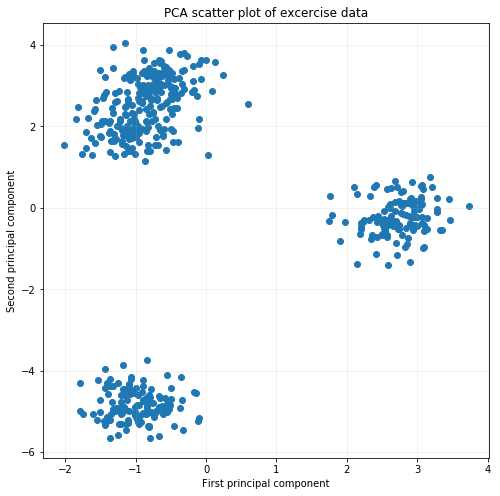

In [336]:
# Plot PCA results

plt.figure(figsize=(8,8))
plt.scatter(data_project[0],data_project[1]);
plt.title("PCA scatter plot of excercise data")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.grid(True,alpha=0.2)
plt.show()

We can clearly see three distinct clusters, or possibly 4 since the center of the top one seems to be a bit split, in the 2-dimensional PCA plot.

## Part 2: Run K-means clustering on the data for different values of K, select the number K for which the clustering has the maximal Silhouette Score, color the scatter plot of the PCA projection

In [337]:
# Import KMeans and metrics from sklearn
# https://scikit-learn.org/stable/modules/clustering.html#k-means

from sklearn.cluster import KMeans
from sklearn import metrics

In [338]:
# Test silhouette score for multiple values of k

for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_
    print("k =", k, ", silhouette score:",metrics.silhouette_score(data, labels, metric='euclidean'))

k = 2 , silhouette score: 0.49884221944224205
k = 3 , silhouette score: 0.5820529527515115
k = 4 , silhouette score: 0.6808147330751131
k = 5 , silhouette score: 0.5209231382596929
k = 6 , silhouette score: 0.3716612478967807
k = 7 , silhouette score: 0.23025762419278709
k = 8 , silhouette score: 0.08739983981061475
k = 9 , silhouette score: 0.0843084473438677


In [339]:
# highest silhouette score for k = 4

kmeans = KMeans(n_clusters=4).fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

In [340]:
# Create a list of colors from the cluster labels

colors_list = []

for i in range(len(labels)):
    if(labels[i] == 0):
        colors_list = colors_list + ['r']
    if(labels[i] == 1):
        colors_list = colors_list + ['g']
    if(labels[i] == 2):
        colors_list = colors_list + ['b']
    if(labels[i] == 3):
        colors_list = colors_list + ['y']

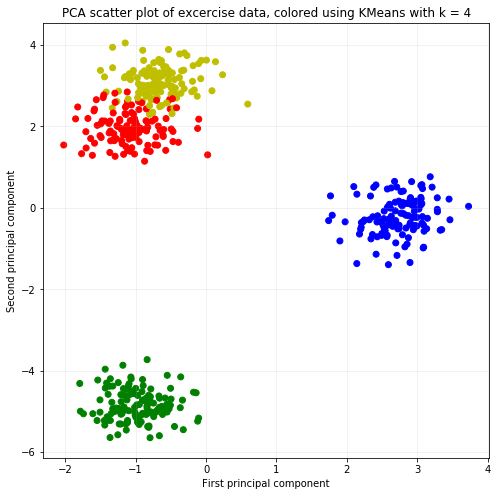

In [341]:
# Plot PCA results
# Color with the results of KMeans clustering

plt.figure(figsize=(8,8))
plt.scatter(data_project[0],data_project[1], color=colors_list);
plt.title("PCA scatter plot of excercise data, colored using KMeans with k = 4")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.grid(True,alpha=0.2)
plt.show()

Optimizing the cluster identification with silhouette score analysis reveals that the data is actually clustered in 4 distinct groups.

## Part 3: Load the Iris data set used in Exercise 2. Visualize,color, and analyze 2-dimensional PCA using KMeans

Part 1: Assume that you are told in advance, that there are three different species you should try to find
from the data. Cluster the original 4-dimensional Iris data into 3 clusters with K-means method. Create
another PCA scatter plot, where you visualize these three clusters. How well does the clustering found
by K-means agree with the true class labels?

Part 2: Assume that you have no prior information about the number of clusters in the data. Select the
number K for which the clustering of Iris has the maximal Silhouette Score. Visualize the K-means
clustering for this value of K. How well does the clustering found by K-means agree with the true class
labels?

In [342]:
# these few cells mostly copied from Excercise 2

# read data to a variable
irisdata = open("iris.data","r")

# store lines to a variable for editing purposes
irislines = irisdata.readlines()

# delete \n from the last element of each row
for i in range( 0 , len(irislines)):
    irislines[i] = irislines[i][0:len(irislines[i])-1]
    
# separate at ","
irisSep = []

for i in range(0,len(irislines)):
    irisSep.append(irislines[i].split(","))
    
# remove empty last row
irisSep = irisSep[0:len(irisSep)-1]

In [343]:
# isolate number rows
irisSep_all = []

for i in range(0,len(irisSep)-1):
        irisSep_all.append(irisSep[i][0:4])

irisSep_all = np.array(irisSep_all, dtype = float)

# Make a copy of the original array for all flower data
irisSep_norm_t = np.zeros((len(irisSep_all.transpose()),len(irisSep_all.transpose()[0])))

for k in range(0,len(irisSep_all.transpose())):
    for h in range(0,len(irisSep_all.transpose()[k])):
        irisSep_norm_t[k][h] = irisSep_all.transpose()[k][h]

# Center the data
for i in range(0,len(irisSep_norm_t)):
    for j in range(0,len(irisSep_norm_t[i])):
        irisSep_norm_t[i][j] = (irisSep_norm_t[i][j] - np.transpose(irisSep_all)[i].mean())/(np.std(irisSep_all[i]))

# Convert to numpy array
irisSep_norm_t = np.array(irisSep_norm_t , dtype = float)

# Correlation matrix
C = (1/((np.transpose(irisSep_all).shape[0])-1))*np.matmul(irisSep_norm_t,irisSep_norm_t.transpose())

eig1 = np.linalg.eigh(C)[0][3]
eig2 = np.linalg.eigh(C)[0][2]
M = np.linalg.eigh(C)[1][0:4,2:4]

# Project data
iris_project = np.matmul(M.transpose(),irisSep_norm_t)

### Part 3.1

In [344]:
# Cluster using k = 3

kmeans_iris = KMeans(n_clusters=3).fit(irisSep_all)
labels_iris = kmeans_iris.predict(irisSep_all)
centroids = kmeans_iris.cluster_centers_

# Create a list of colors from the cluster labels

colors_iris = []

for i in range(len(labels_iris)):
    if(labels_iris[i] == 0):
        colors_iris = colors_iris + ['r']
    if(labels_iris[i] == 1):
        colors_iris = colors_iris + ['g']
    if(labels_iris[i] == 2):
        colors_iris = colors_iris + ['b']

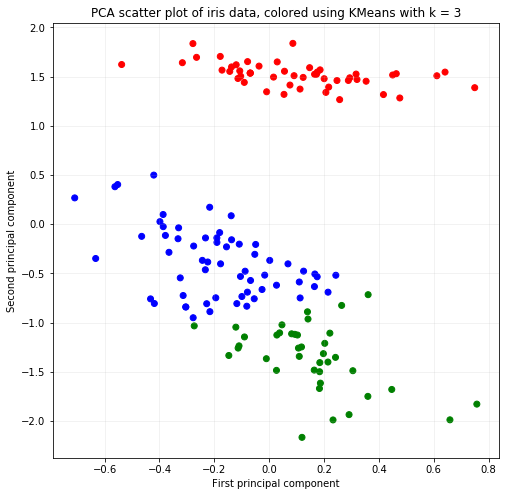

In [345]:
# Plot PCA results
# Color with the results of KMeans clustering

plt.figure(figsize=(8,8))
plt.scatter(iris_project[0],iris_project[1], color=colors_iris);
plt.title("PCA scatter plot of iris data, colored using KMeans with k = 3")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.grid(True,alpha=0.2)
plt.show()

Setosa is perfectly identified using the clustering, but the other two species are somewhat mixed compared to the true coloring. Somewhat reliable method for identifying the correct species.

### Part 3.2

In [346]:
# Test silhouette score for multiple values of k

for k in range(2,10):
    kmeans_iris = KMeans(n_clusters=k).fit(irisSep_all)
    labels_iris = kmeans_iris.predict(irisSep_all)
    centroids_iris = kmeans_iris.cluster_centers_
    print("k =",k,", silhouette score:",metrics.silhouette_score(irisSep_all, labels_iris, metric='euclidean'))

k = 2 , silhouette score: 0.6799918651684914
k = 3 , silhouette score: 0.5538239666132284
k = 4 , silhouette score: 0.49824811776452305
k = 5 , silhouette score: 0.4905104738313457
k = 6 , silhouette score: 0.3676780549373617
k = 7 , silhouette score: 0.34851063375835645
k = 8 , silhouette score: 0.353896778524314
k = 9 , silhouette score: 0.3260298766411971


In [347]:
# Cluster using k = 2

kmeans_iris = KMeans(n_clusters=2).fit(irisSep_all)
labels_iris = kmeans_iris.predict(irisSep_all)
centroids_iris = kmeans_iris.cluster_centers_

# Create a list of colors from the cluster labels

colors_iris = []

for i in range(len(labels_iris)):
    if(labels_iris[i] == 0):
        colors_iris = colors_iris + ['r']
    if(labels_iris[i] == 1):
        colors_iris = colors_iris + ['g']
    if(labels_iris[i] == 2):
        colors_iris = colors_iris + ['b']

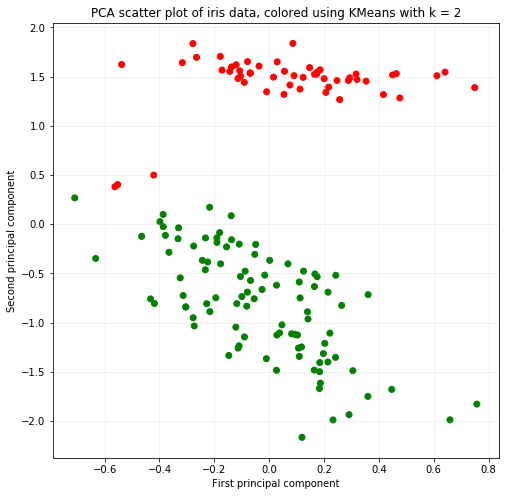

In [348]:
# Plot PCA results
# Color with the results of KMeans clustering

plt.figure(figsize=(8,8))
plt.scatter(iris_project[0],iris_project[1], color=colors_iris);
plt.title("PCA scatter plot of iris data, colored using KMeans with k = 2")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.grid(True,alpha=0.2)
plt.show()

As expected, the optimization w.r.t. metric identifies two distinct clusters with decent accuracy. Setosa is again its own cluster, but the other two species are clumped together. Not reliable as a method for identification, since the amount of clusters is already lower than the amount of species.

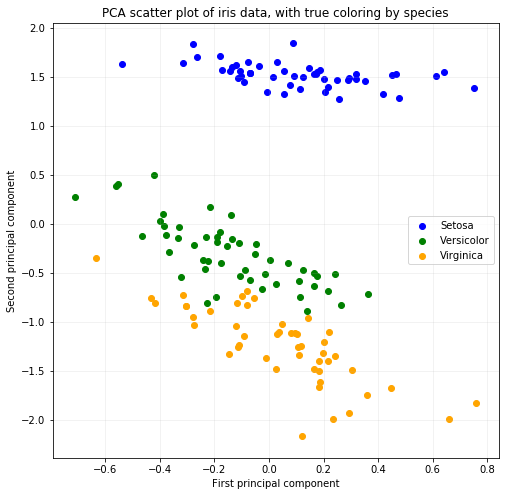

In [349]:
# Plot PCA results with true coloring by species

plt.figure(figsize=(8,8))
plt.scatter(np.matmul(M.transpose(),irisSep_norm_t)[0][0:50],np.matmul(M.transpose(),irisSep_norm_t)[1][0:50], color="blue", label="Setosa")
plt.scatter(np.matmul(M.transpose(),irisSep_norm_t)[0][50:100],np.matmul(M.transpose(),irisSep_norm_t)[1][50:100], color="green", label="Versicolor")
plt.scatter(np.matmul(M.transpose(),irisSep_norm_t)[0][100:150],np.matmul(M.transpose(),irisSep_norm_t)[1][100:150], color="orange", label="Virginica")
plt.legend(loc='right')
plt.title("PCA scatter plot of iris data, with true coloring by species")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.grid(True,alpha=0.2)
plt.show()